### Deskripsi Tugas

Deskripsi Tugas:

1. Buatlah visualisasi dari dataset yang sudah disediakan. Gunakan dataset yang ada pada bagian Resources > LK09 Basic Visualiztion
Untuk setiap Visualisasi:

2. Berikan penekanan informasi yang akan disampaikan (mengacu pada materi “Data to Visulaization”) dengan menambahkan visualisasi tambahan pada graph (ex: trend line, tanda panah pada data yang di highlight etc.)

3. Berikan penjelasan dalam cell terpisah dalam bentuk markdown pada informasi yang akan disampaikan pada graph tersebut
- Pada setiap graph yang divisualisasikan silahkan bisa dikreasikan dengan mempertimbangkan graph alternatif

4. Detail tugas pada setiap visualisasi:
- Area Plot:
    1. Membuat area plot pada negara yang memiliki angka imigrasi tinggi ke Kanada (top 5)
    2. Membuat area plot pada negara yang memiliki angka imigrasi tinggi ke Kanada (top 10)
- Histogram
    1. Visualisasikan jumlah persebaran semua neagra imigran tahun 2013
    2. Visualisasikan jumlah persebaran semua negara imigran tahun 1980
    3. Visualisasikan perbandingan imigran tahun 1980 dan 2013
- Bar Charts
    1. Visualisasikan jumlah imigran Islandia ke Kanada dari tahun 2013 – 2013
    2. Visualisasikan jumlah imigran China ke Kanada dari tahun 1980 – 2013
    3. Visualisasikan perbandingan perwakilan Eropa (Islandia) dan perwakilan Asia (China) ke Kanada dari tahun 1980 - 2013
- Pie Charts
    1. Visualisasikan imigran bedasarkan benua
    2. Visualisasikan imigran berdasarkan Developing Country atau Developed Country
- Box Plots
    1. Visualisaikan distribusi imigran Jepang ke Kanada tahun 1980 – 2013
    2. Visualisasikan distribusi imigran India ke Kanada tahun 1980 - 2013
- Scatter Plots
    1. Visualisasi total tahunan jumlah imigran dari 1980 – 2013
    2. Visualisasi rata-rata tahunan jumlah imigran dari 1980 – 2013

Instruksi Pengumpulan:
1. Berikan identitas nama dan NIM pada notebook
    1. Penamaan file: nomor-presensi-siam_LK09_nama-mahasiswa
    
    contoh: 0_LK09_Fitra Bachtiar
Deadline 1 minggu

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!pip install xlrd
!pip install openpyxl

     |████████████████████████████████| 96 kB 8.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 242 kB 14.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df = pd.read_excel("CanadaDataset.xlsx", sheet_name='Canada by Citizenship (2)')
df = df.iloc[:, :-8]
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Preprocessing awal

- Menghapus fitur type, coverage, area, reg dan dev karena tidak diperlukan 
- Mengubah nama fitur OdName -> Country, AreaName -> Continent, RegName -> Region 
- Mengubah nama negara menjadi index
- Menghapus fitur numerik selain tahun
- Membuat kolom Total untuk total seluruh migrasi dari tahun 1980 sampai 2013 
- Melakukan sorting berdasarkan total tertinggi descending

In [ ]:
df.drop(['Type','Coverage','AREA','REG','DEV'], inplace=True, axis=1)
df.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True) 
df.set_index('Country',inplace=True)
df['Total'] = df.sum(axis=1)

In [ ]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


## 1. Area Plot

In [ ]:
tahun = list(map(int,range(1980,2014)))

df.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df_top5=df.head()
df_top5=df_top5[tahun].transpose()

In [ ]:
df_top5.head(5)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880,5123,22045,44000,6051
1981,8670,6682,24796,18078,5921
1982,8147,3308,20620,16904,5249
1983,7338,1863,10015,13635,4562
1984,5704,1527,10170,14855,3801


In [ ]:
tahun2 = list(map(int,range(1980,2014)))
df.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df_top10=df.head(10)
df_top10=df_top10[tahun2].transpose()

In [ ]:
df_top10.head(10)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea
1980,8880,5123,22045,44000,6051,978,9378,1172,185,1011
1981,8670,6682,24796,18078,5921,972,10030,1429,371,1456
1982,8147,3308,20620,16904,5249,1201,9074,1822,290,1572
1983,7338,1863,10015,13635,4562,900,7100,1592,197,1081
1984,5704,1527,10170,14855,3801,668,6661,1977,1086,847
1985,4211,1816,9564,14368,3150,514,6543,1648,845,962
1986,7150,1960,9470,13303,4166,691,7074,1794,1838,1208
1987,10189,2643,21337,17304,7360,1072,7705,2989,4447,2338
1988,11522,2758,27359,22279,8639,1334,6469,3273,2779,2805
1989,10343,4323,23795,27118,11865,2261,6790,3781,2758,2979


### - Top 5 Imigrasi tertinggi ke Kanada

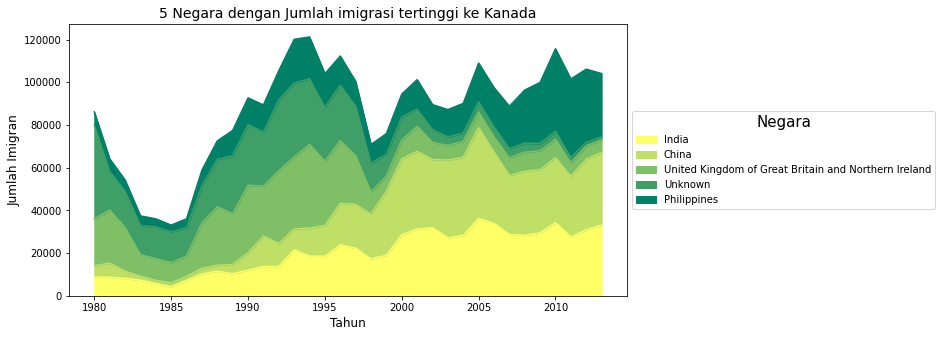

In [ ]:
ax_area5 = df_top5.plot(kind='area', figsize=(10,5),colormap='summer_r')

plt.title('5 Negara dengan Jumlah imigrasi tertinggi ke Kanada',fontsize=14)
plt.ylabel('Jumlah Imigran',fontsize=12)
plt.xlabel('Tahun',fontsize=12)
ax_area5.legend(title='Negara',title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Penjelasan**

-> Graph diatas menggambarkan 5 Negara dengan jumlah imigrasi tertinggi ke Kanada dengan menggunakan Area Chart. Area Chart disini saya bentuk dengan menggunakan colormap summer_r untuk menggambarkan perbandingan rasio antara tiap negara tersebut berdasarkan warna kegelapannya. 

Dari Area Chart ini kita mendapatkan informasi berupa total dari 5 negara terbesar ini beserta juga jumlahnya untuk setiap segmen yang terbuat pada area chart ini, Maka disini kita dapat melihat perbandingan antara jumlah nya per-negara.
1. India dan China disini memiliki jumlah yang paling besar dan jumlahnya yang relatif selalu meningkat 
2. Disini puncak yang melakukan imigrasi ke kanada dalam satu waktu adalah dapat dikatakan sebanyak 120,000 dari 5 negara ini digabungkan yang terjadi pada tahun 1990 sampai tahun 1995 dan begitu pula dimana angkanya hampir mencapai 120,000 pada tahun 2010
3. Dapat dilihat pada hasil plotting area chart, dimana pada awal tahun 1980 total imigran yang dikirimkan ke Kanada adalah banyak, kemudian jumlahnya menurun sampai kisaran tahun 1985. Kemudian menaik lagi dan memuncak sampai sekitar tahun 1990 - 1995. Kemudian berbentuk fluktuatif dengan rentang yang tidak jauh untuk tahun - tahun setelahnya 
4. Untuk 5 negara tertinggi penyumbang imigran terbesar, salah satunya adalah Unknown, Dimana unknown disini tidak diketahui asal negara nya. 

### - Top 10 Imigrasi tertinggi ke Kanada

<Figure size 7200x3600 with 0 Axes>

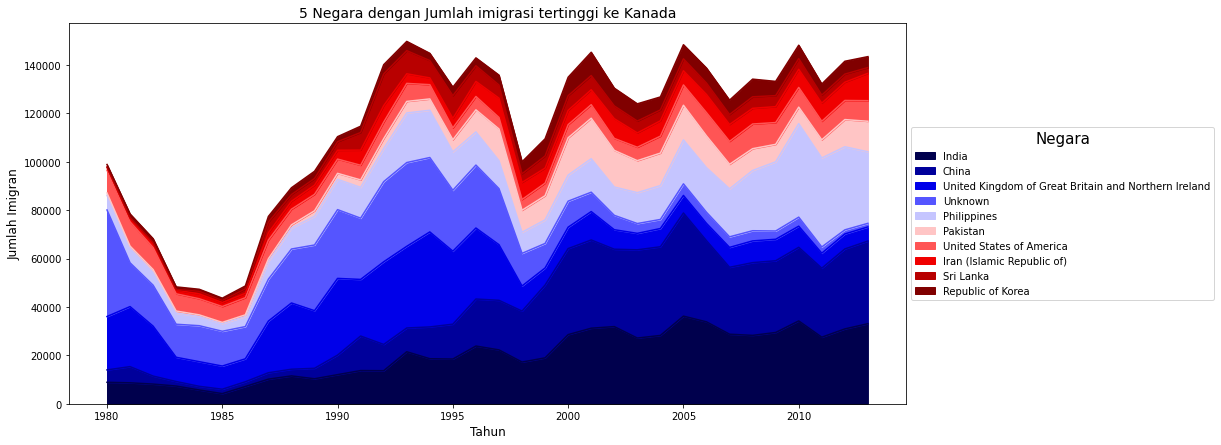

In [ ]:
plt.figure(figsize=(100,50))

ax_area10 = df_top10.plot(kind='area',figsize=(15,7),colormap='seismic')

plt.title('5 Negara dengan Jumlah imigrasi tertinggi ke Kanada',fontsize=14)
plt.ylabel('Jumlah Imigran',fontsize=12)
plt.xlabel('Tahun',fontsize=12)
ax_area10.legend(title='Negara',title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Penjelasan**

-> Graph diatas menggambarkan 10 Negara dengan jumlah imigrasi tertinggi ke Kanada dengan menggunakan Area Chart. Area Chart disini saya bentuk dengan menggunakan colormap seismic untuk menggambarkan perbandingan rasio antara tiap negara tersebut berdasarkan warna kegelapannya dan juga warna yang bersebrangan, karena sebelumnya jika hanya menggunakan color palette yang sama dengan opacity yang berbeda maka akan lebih sulit untuk dilihat perbandingannya karena disini datanya lebih banyak dibandingkan pada nomor sebelumnya. 

Dari Area chart ini informasi yang bisa didapatkan berupa
1. Pada tahun 1980, jumlah imigrasi ke Kanada melonjak sampai 100,000 imigran dari 10 negara tertinggi ini. Kemudian mengalami penurunan sampai tahun 1985
2. Kemudian mengalami kenaikan imigran pada tahun 1985 sampai kisaran tahun 1995 dimana jumlahnya melebihi 140,000 imigran
3. Pada antara tahun 1995 - 2000 terdapat penurunan yang signifikan namun menaik kembali di tahun 2000 - 2005 
4. Kemudian jumlah imigran setelahnya selalu naik turun pada tahun - tahun setelahnya

## 2. Histogram

### - Persebaran negara imigran tahun 2013

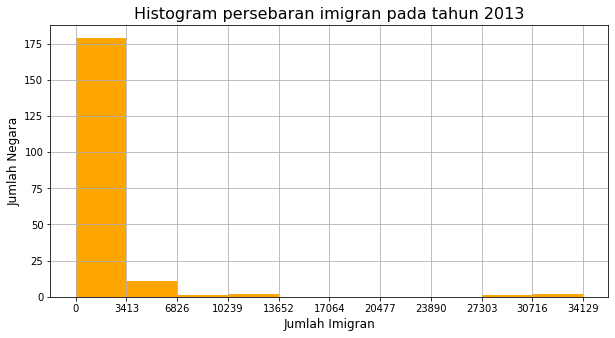

In [ ]:
count, bin_edge = np.histogram(df[2013])

df[2013].plot(kind='hist',xticks= bin_edge, figsize=(10,5), grid=True,facecolor='orange')
plt.title("Histogram persebaran imigran pada tahun 2013",fontsize=16)
plt.ylabel('Jumlah Negara',fontsize=12)
plt.xlabel('Jumlah Imigran',fontsize=12)

plt.show()

**Penjelasan**

-> Graph diatas menggambarkan persebaran imigran pada tahun 2013 pada setiap negara ke Kanada dengan menggunakan Histogram. Histogram ini menggambarkan informasi tentang berapa banyak negara dengan jumlah terkecil maupun tersbesarnya yang menyumbang imigran ke Kanada pada tahun 2013

Dari Histogram ini informasi yang bisa didapatkan berupa
1. Persebaran yang terbentuk tidak normal, yakni graph histogram yang bersifat _skewed right_
2. Pada tahun 2013, Total negara yang menyumbang jumlah imigran kurang dari 3,413 orang ke Kanada melebihi 175 negara 
3. Pada tahun 2013, Total negara yang menyumbang jumlah imigran dengan rentang 30,000 sampai 35,000 orang adalah kurang dari 25 negara
4. Dari histogram, dapat disimpulkan hanya sebagian kecil negara - negara yang menyumbang imigran dengan jumlah besar ke Kanada pada tahun 2013

### - Persebaran negara imigran tahun 1980

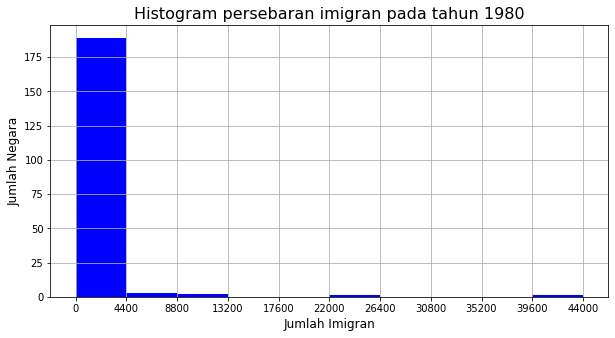

In [ ]:
count, bin_edge = np.histogram(df[1980])

df[1980].plot(kind='hist', xticks=bin_edge,figsize=(10,5), grid= True, facecolor='blue')
plt.title("Histogram persebaran imigran pada tahun 1980",fontsize=16)
plt.ylabel('Jumlah Negara',fontsize=12)
plt.xlabel('Jumlah Imigran',fontsize=12)
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan persebaran imigran pada tahun 1980 pada setiap negara ke Kanada dengan menggunakan Histogram. Histogram ini menggambarkan informasi tentang berapa banyak negara dengan jumlah terkecil maupun tersbesarnya yang menyumbang imigran ke Kanada pada tahun 1980

Dari Histogram ini informasi yang bisa didapatkan berupa
1. Persebaran yang terbentuk tidak normal, yakni graph histogram yang bersifat _skewed right_
2. Pada tahun 1980, Total negara yang menyumbang jumlah imigran kurang dari 4,400 orang ke Kanada melebihi 175 negara 
3. Pada tahun 1980, Total negara yang menyumbang jumlah imigran dengan rentang 39,600 sampai 44,000 orang adalah kurang dari 25 negara
4. Dari histogram, dapat disimpulkan hanya sebagian kecil negara - negara yang menyumbang imigran dengan jumlah besar ke Kanada pada tahun 1980

### - Perbandingan 1980 dan 2013

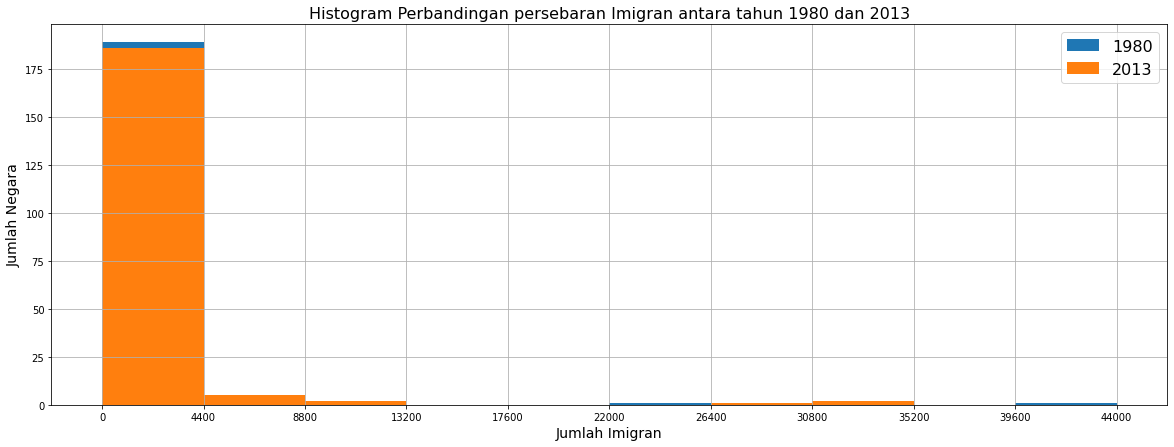

In [ ]:
count, bin_edge = np.histogram(df[[1980,2013]])

df[[1980,2013]].plot(kind='hist', xticks=bin_edge,figsize=(20,7), grid= True, alpha=1)

plt.title('Histogram Perbandingan persebaran Imigran antara tahun 1980 dan 2013', fontsize= 16)

plt.ylabel('Jumlah Negara',fontsize=14)
plt.xlabel('Jumlah Imigran',fontsize=14)
# plt.hist([df[1980],df[2013]], xticks=bin_edge,label=['Tahun 1980','Tahun 2013'],alpha=.5)

plt.legend(loc='best',fontsize=16)
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan perbandingan persebaran imigran pada tahun 1980 dan 2013 pada setiap negara ke Kanada dengan menggunakan Histogram. Histogram ini menggambarkan perbandingan informasi tentang berapa banyak negara dengan jumlah terkecil maupun tersbesarnya yang menyumbang imigran ke Kanada pada tahun 1980 dan 2013

Dari Histogram ini informasi yang bisa didapatkan berupa
1. Persebaran yang terbentuk tidak normal, yakni graph histogram yang bersifat _skewed right_
2. Total negara yang menyumbang jumlah imigran kurang dari 4,400 orang ke Kanada melebihi 175 negara dimana untuk tahun 1980 melebihi jumlah negara nya dibanding tahun 2013 
3. Untuk tahun 1980 dapat dilihat bahwa terdapat beberapa negara yang menyumbang imigran ke kanada dengan jumlah imigran sampai mencapai 44,000 sedangkan pada tahun 2013 jumlah imigran tertinggi adalah 35,200
4. Dari histogram, dapat disimpulkan bahwa pada tahun 1980 dan 2013. Dominan terhadap banyak negara yang menyumbang imigran kurang dari 4,400 imigran atau bahkan tidak sama sekali dibandingkan dengan negara yang menyumbang banyak imigran
5. Maka disini kita dapat lihat juga bahwa hanya sedikit negara yang menyumbang dengan jumlah imigran besar dan tidak berubah drastis jumlah negara tersebut dari tahun 1980 sampai 2013 

## 3. Bar Chart

### - Imigrasi imigran Islandia ke Kanada tahun 1980 - 2013

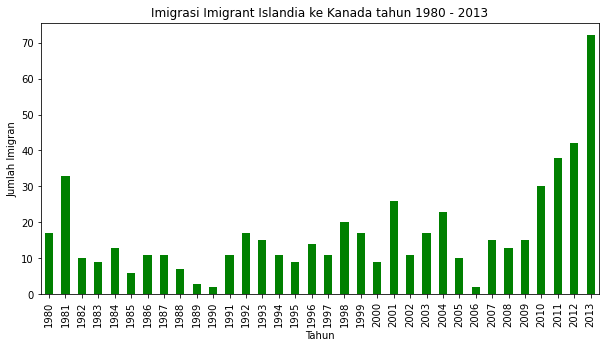

In [ ]:
tahun = list(map(int,range(1980,2014)))
df_iceland = df.loc['Iceland',tahun]

df_iceland.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Imigrasi Imigrant Islandia ke Kanada tahun 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan berkembangan Jumlah Imigran setiap tahunnya yang berasal dari Islandia dimana disini datanya di plot berdasarkan jumlah terhadap tahun nya menggunakan Bar chart. Penggunaan Bar chart disini memudahkan kita untuk melihat progress fluktuatif atau perkembangan suatu data berdasarkan time series. Informasi yang didipatkan berupa:

1. Islandia tidak terlalu menyumbang terlalu banyak imigran ke Kanada, dapat dilihat pada y-axis dalam graph ini dimana untuk skala nya adalah per 10 orang dimana puncaknya terdapat pada 70.
2. imigrant pada Islandia melakukan imigrasi ke Kanada terbesar adalah pada tahun 2013 dimana jumlahnya mencapai 70 lebih
3. rata - rata imigran dari Islandia ini berjumlah 10 - 30 orang
4. jumlah imigran yang berasal dari Islandia terkecil terjadi pada tahun 1985, 1989, 1990 dan 2006

Maka disini kita dapat menyimpulkan bahwa imigran yang berasal dari Islandia jumlahnya tidak terlalu banyak pada setiap tahunnya karena jumlahnya yang bahkan tidak mencapai 100 orang.



### - Imigrasi imigran Cina ke Kanada tahun 1980 - 2013

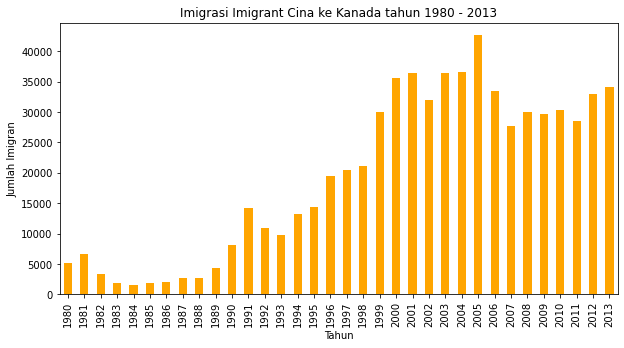

In [ ]:
tahun = list(map(int,range(1980,2014)))
df_china = df.loc['China',tahun]

df_china.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Imigrasi Imigrant Cina ke Kanada tahun 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan berkembangan Jumlah Imigran setiap tahunnya yang berasal dari Cina dimana disini datanya di plot berdasarkan jumlah terhadap tahun nya menggunakan Bar chart. Penggunaan Bar chart disini memudahkan kita untuk melihat progress fluktuatif atau perkembangan suatu data berdasarkan time series. Informasi yang didipatkan berupa:

1. Cina menyumbang banyak imigran ke Kanada, dapat dilihat pada y-axis dalam graph ini dimana untuk skala nya dihitung per 5,000 orang berbeda dengan pada graph sebelumnya yang menjelaskan untuk Islandia dimana puncaknya hanya mencapai 70, disini mencapai 40,000 lebih. 
2. imigrant pada Cina melakukan imigrasi ke Kanada terbesar pada tahun 2005 dimana jumlahnya bahkan melebihi 40,000 orang 
3. Selama 11 tahun pertama yakni tahun 1980 - 1990. Rata - rata jumlah imigran tidak mencapai 5000 orang. Sedangkan setelah itu jumlah orang mulai menaik pada tahun 1991 dan seterusnya, kemudian melonjak pada tahun 1999 kemudian nilainya berfluktuatif dengan range yang tidak jauh pada tahun - tahun setelahnya
4. Jumlah imigran yang berasal dari Cina terkecil terjadi pada tahun  1983 - 1986. Namun perlu diperhatikan disini bahwa dibandingkan dengan Islandia sebelumnya, tentunya Cina imigrannya jauh lebih banyak 

Maka disini kita dapat menyimpulkan bahwa imigran yang berasal dari Cina berawal sedikit dan meningkat terus pada setiap tahunnya dan jumlah orang yang melakukan imigrasinya relatif banyak.



### - Perbandingan imigran Islandia dan Cina ke Kanada tahun 1980 - 2013

Text(0, 0.5, 'Jumlah Imigran')

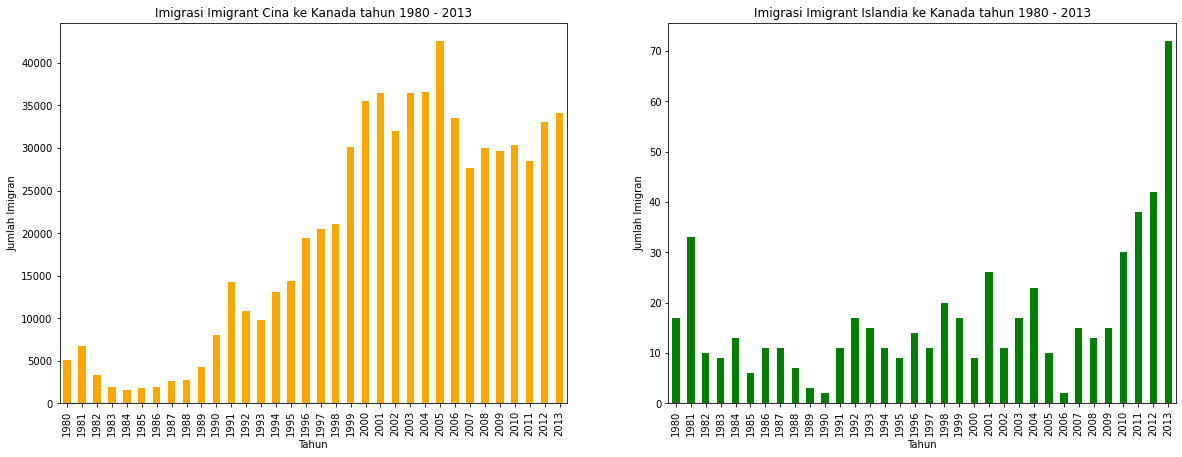

In [ ]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
df_china.plot(kind='bar',color='orange')
plt.title('Imigrasi Imigrant Cina ke Kanada tahun 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')

plt.subplot(1,2,2)
df_iceland.plot(kind='bar',color='green')
plt.title('Imigrasi Imigrant Islandia ke Kanada tahun 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Imigran')



**Penjelasan**

-> Kedua Graph diatas menggambarkan perbandingan tentang  berkembangan Jumlah imigran setiap tahunnya yang berasal dari Cina dan Islandia ke Kanada dimana disini datanya di plot berdasarkan jumlah terhadap tahun nya menggunakan dua Bar chart. Disini saya menggunakan 2 bar chart yang terpisah kareana jumlah data yang drastis jauh berbeda antara data imigran Islandia dengan data imigran Cina. Seperti yang sudah dijelaskan sebelumnya bahwa untuk data Cina menggunakan interval data per 5,000 orang sedangkan untuk Islandia menggunakan interval data per 10 orang

Maka jika kedua bar nya digabungkan, informasi tidak dapat dilihat dengan jelas karena perbedaan skala yang jauh, Maka disini untuk melihat perbandingannya menggunakan 2 bar chart yang berbeda. Maka disini dapat disimpulkan untuk negara Islandia jumlah imigrannya tidak sebanding dengan jumlah imigran dari negara Cina yang jauh lebih banyak.



### - Tambahan, perbandingan imigran Pakistan dan Filipina pada tahun 1980 - 2013

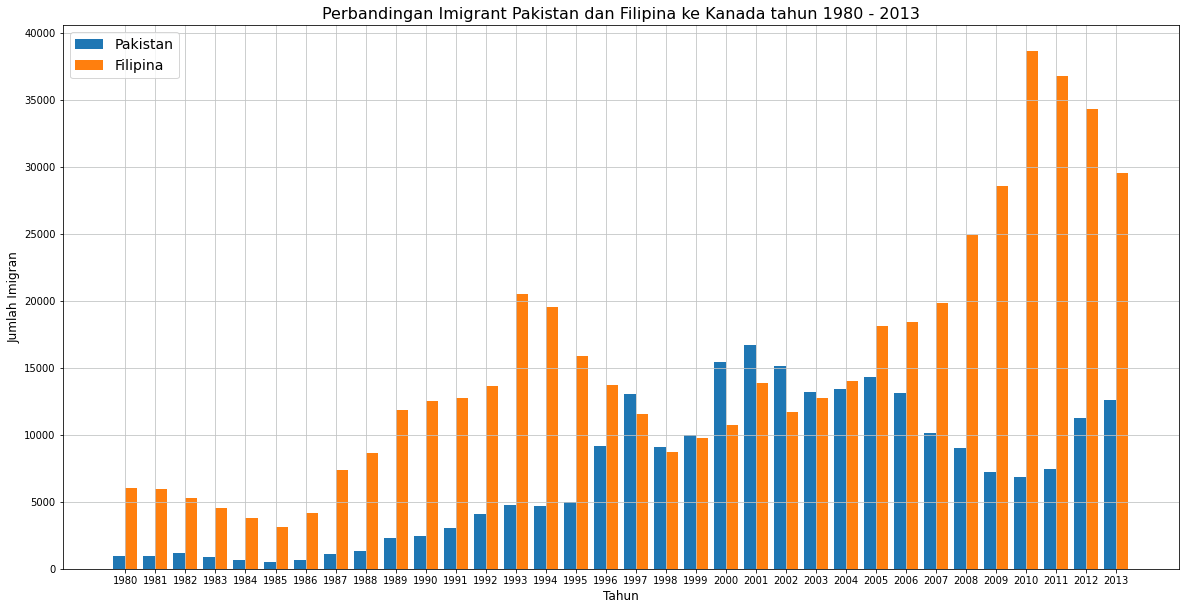

In [ ]:
tahun = list(map(int,range(1980,2014)))
df_philippines = df.loc['Philippines',tahun]
df_pakistan = df.loc['Pakistan',tahun]
w=.4

bar1=np.arange(len(tahun))
bar2=[i+w for i in bar1]

plt.figure(figsize=(20,10))
plt.grid(color='#C1C3C4')

plt.title('Perbandingan Imigrant Pakistan dan Filipina ke Kanada tahun 1980 - 2013',fontsize = 16)
plt.bar(bar1,df_pakistan,w,label="Pakistan")
plt.bar(bar2,df_philippines,w,label='Filipina')

plt.xticks(bar1+w/2,tahun)
plt.ylabel('Jumlah Imigran',fontsize=12)
plt.xlabel('Tahun',fontsize=12)

plt.legend(loc='upper left',fontsize=14)
plt.show()

**Penjelasan**

-> Pada graph ini, merupakan satu bar chart yang digunakan untuk melihat perbandingan antara negara Filipina dan Pakistan, dimana untuk Warna Biru adalah Pakistan dan Warna Orange adalah Filipina. Berbeda dengan perbandingan Islandia dan Cina, untuk kedua negara disini skala nya tidak jauh berbeda. Maka dalam melakukan perbandingannya disini dapat dilakukan cukup menggunakan 1 bar chart. 
Informasi yang didapatkan disini berupa:

1. Filipina lebih banyak menyumbang imigran ke Kanada dibandingkan Pakistan pada setiap tahunnya kecuali pada rentang tahun 1997 - 2003 dimana Pakistan menyumbang imigran dengan jumlah yang lebih banyak dibanding Filipina
2. Puncak tertinggi imigran ke Kanada dari Filipina terdapat pada tahun 2010 sedangkan dari Pakistan terdapat pada tahun 2001. Pada tahun 2010 tersebut, imigran yang berasal dari Pakistan jumlahnya jauh lebih sedikit dibandingkan dari Filipina. Sedangkan pada tahun 2001, imigran yang berasal dari Pakistan jumlahnya lebih banyak daripada Filipina namun tidak beda jauh jumlahnya
3. Lonjakan jumlah imigran dari Filipa terjadi pada rentang tahun 2005 - 2010 dan menurun lagi di tahun - tahun berikutnya. Sedangkan lonjakan jumlah imigran dari Pakistan terjadi pada rentang tahun 1995 - 2001, Kemudian jumlahnya fluktuatif namun tidak terlalu banyak menaik atau menurun 



## 4. Pie Chart

In [ ]:
df_benua=df.groupby('Continent',axis=0).sum()
df_benua

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


In [ ]:
df_devel=df.groupby('DevName',axis=0).sum()
df_devel

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
DevName,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


### - Komposisi imigran berdasarkan Benua

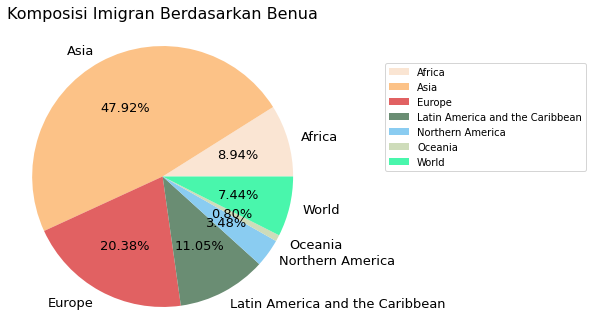

In [ ]:
# plt.title('Komposisi Imigran Berdasarkan Benua',loc='left',bbox_to_anchor=(2,0.5))
plt.title('Komposisi Imigran Berdasarkan Benua', y=1.2, fontsize=16)

textprops = {"fontsize":13}
colors=["#FAE5D3","#FCC287","#E16162", "#6A8D73","#8ACCF1","#CEDCBA","#49F6AC"]

df_benua['Total'].plot(kind='pie',autopct="%.2f%%",radius=1.5,textprops=textprops,colors=colors)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.ylabel(' ')
plt.legend(loc='lower left', bbox_to_anchor=(1.5, 0.5))
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan Komposisi Imigran berdasarkan Benua nya menggunakan Pie chart. Penggunaan Pie chart disini memudahkan kita untuk melihat rasio dengan lebih mudah karena bentuk lingkaran tersebut. Disini saya menambahkan persentase serta penamaan terhadap setiap segmen yang terdapat dalam pie chart ini. Informasi yang didapatkan berupa:

1. 47.92% Imigran ke Kanada berasal dari Benua Asia
2. 20.38% Imigran ke Kanada berasal dari Benua Eropa
3. 11.05% Imigran ke Kanada berasal dari Benua Latin Amerika dan Karibean
4. 8.94% Imigran ke Kanada berasal dari Benua Afrika
5. 7.44% Imigran Ke Kanada berasal dari Benua World
6. 3.48% Imigrasi ke Kanada berasal dari Amerika Utara
7. 0.80% Imigrasi ke Kanada berasal dari Oceania

Maka disini kita dapat menyimpulkan bahwa penyumbah Imigran tersebesar ke Kanada adalah berasal dari Benua Asia dan terkecil berasal dari Benua Oceania 


### - Komposisi berdasarkan developing &amp; developed country 

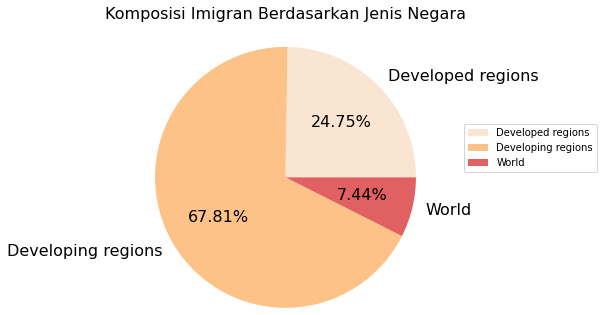

In [ ]:
plt.title('Komposisi Imigran Berdasarkan Jenis Negara', y=1.2, fontsize = 16)

textprops = {"fontsize":16}
colors=["#FAE5D3","#FCC287","#E16162"]

df_devel['Total'].plot(kind='pie',autopct="%.2f%%",radius=1.5,textprops=textprops,colors=colors)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.ylabel(' ')
plt.legend(loc='lower left', bbox_to_anchor=(1.3, 0.5))
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan Komposisi Imigran berdasarkan jenis negara dimana disini dibagi menjadi tiga yakni Developed Regions/Negara maju, Developing Regions/Negara berkembang, World/Thrid world country nya menggunakan Pie chart. Penggunaan Pie chart disini memudahkan kita untuk melihat rasio dengan lebih mudah karena bentuk lingkaran tersebut. Disini saya menambahkan persentase serta penamaan terhadap setiap segmen yang terdapat dalam pie chart ini. Informasi yang didapatkan berupa:

1. 67.81% Imigran ke Kanada berasal dari negara yang masih berkembang
2. 24.75% Imigran ke Kanada berasal dari negara yang sudah maju
3. 7.44% Imigran ke Kanada berasal dari negara yang relatif miskin

Maka disini kita dapat menyimpulkan bahwa penyumbah Imigran tersebesar ke Kanada adalah berasal dari negara yang masih berkembang dan terkecil adalah yang berasal dari negara miskin 



## 5. Box Plot

In [ ]:
tahun = list(map(int,range(1980,2014)))

df_japan = df.loc[['Japan'],tahun].transpose()
df_india = df.loc[['India'],tahun].transpose()

### - Distribusi Imigran Jepang ke Kanada tahun 1980 - 2013

Text(0, 0.5, 'Jumlah Imigran')

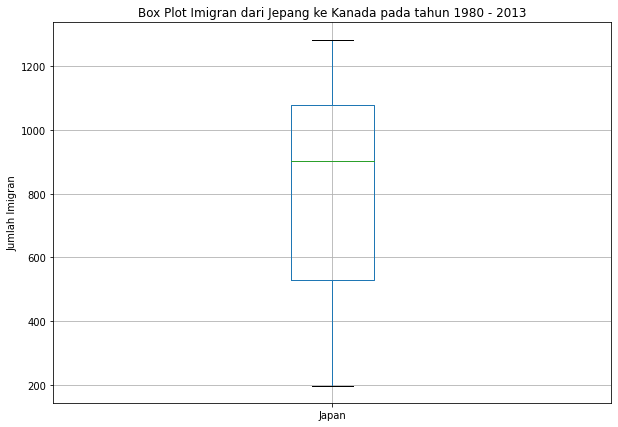

In [ ]:
df_japan.plot(kind='box', figsize=(10,7), grid=True)

plt.title("Box Plot Imigran dari Jepang ke Kanada pada tahun 1980 - 2013")
plt.ylabel('Jumlah Imigran')


**Penjelasan**

-> Graph diatas menggambarkan central tendency jumlah Imigran dari Jepang ke Kanada pada tahun 1980 - 2013 menggunakan Box Plot. Penggunaan Box Plot disini memudahkan kita untuk melihat persebaran data. Dapat dilihat pada hasil plotting disini untuk skala nilainya ada per 200 orang. Informasi yang didapatkan berupa:
1. Q1, digambarkan dengan batas box dibagian bawah dimana nilainya disini dapat kita katakan berada pada rentang antara 500 - 550 
2. Q2, digambarkan dengan garis hijau yang beada di tengah box dimana nilainya disini dapat dikatakan adalah kurang lebih 900
3. Q3, digambarkan dengan batas box dibagian atas dimana nilainya disini kita katakan berada pada rentang antara 1,050 - 1,100
4. IQR, Inter Quartile Range disini nilainya di dapatkan dari Pengurangan q3 dan q1 (Q3 - Q1), Pada box plot IQR ini berupa gambar box tersebut. Kemudian nilai tersebut digunakan untuk menggambarkan whisker/garis vertical dan horizontal yang terdapat pada bagian atas dan bawah box, hal ini berguna sebagai batas nilai dimana jika terdapat nilai yang berada di atas atau dibawah whisker tersebut maka berupa Outlier. whisker tersebut dibentuk dengan menggunakan 1.5xIQR + Q3 dan 1.5xIQR + Q1. Kemudian hasil tersebut menjadi batas nilai maximum dan minimum untuk data. Disini untuk minimumnya adalah 200 dan maximumnya adalah 1300
5. Tidak terdapat Outlier, Karena Outlier digambarkan dengan titik yang berada di luar batas whisker. Dapat dilihat pada hasil plotting tidak terdapat titik diluar whisker

### - Distribusi Imigran India ke Kanada tahun 1980 - 2013

Text(0, 0.5, 'Jumlah Imigran')

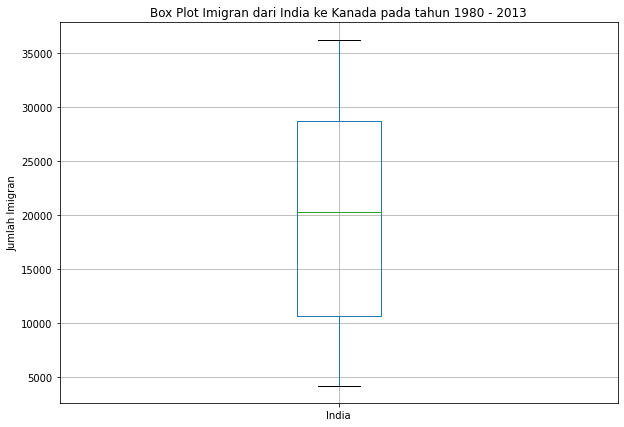

In [ ]:
df_india.plot(kind='box', figsize=(10,7), grid=True)

plt.title("Box Plot Imigran dari India ke Kanada pada tahun 1980 - 2013")
plt.ylabel('Jumlah Imigran')


**Penjelasan**

-> Graph diatas menggambarkan central tendency jumlah Imigran dari India ke Kanada pada tahun 1980 - 2013 menggunakan Box Plot. Penggunaan Box Plot disini memudahkan kita untuk melihat persebaran data. Dapat dilihat pada hasil plotting disini untuk skala nilainya ada per 5,000 orang. Informasi yang didapatkan berupa:
1. Q1, digambarkan dengan batas box dibagian bawah dimana nilainya disini kurang lebih 11,000 
2. Q2, digambarkan dengan garis hijau yang beada di tengah box dimana nilainya disini terdapat pada kurang lebih 21,000
3. Q3, digambarkan dengan batas box dibagian atas dimana nilainya disini kurang lebih 28,000 
4. IQR, Inter Quartile Range disini nilainya di dapatkan dari Pengurangan q3 dan q1 (Q3 - Q1), Pada box plot IQR tersebut menggambarkan box. Kemudian nilai tersebut digunakan untuk menggambarkan whisker/garis vertical dan horizontal yang terdapat pada bagian atas dan bawah box, hal ini berguna sebagai batas nilai dimana jika terdapat nilai yang berada di atas atau dibawah whisker tersebut maka berupa Outlier. whisker tersebut dibentuk dengan menggunakan 1.5xIQR + Q3 dan 1.5xIQR + Q1. Kemudian hasil tersebut menjadi batas nilai maximum dan minimum untuk data, Disini untuk minimumnya adalah 4,000 dan maximumnya adalah 37,000
5. Tidak terdapat Outlier, Karena Outlier digambarkan dengan titik yang berada di luar batas whisker. Dapat dilihat pada hasil plotting tidak terdapat titik diluar whisker

## 6. Scatter Plot

### - Total tahunan dari 1980 - 2013

In [ ]:
series = df.loc[:,1980:2013].sum()
df_totalTahun = series.to_frame(name='Total')
df_totalTahun.reset_index(inplace=True)
df_totalTahun.rename(columns={'index': 'Year'},inplace = True)

In [ ]:
df_totalTahun

,Year,Total
0,1980,143137
1,1981,128641
2,1982,121175
3,1983,89185
4,1984,88272
5,1985,84346
6,1986,99351
7,1987,152075
8,1988,161585
9,1989,191550


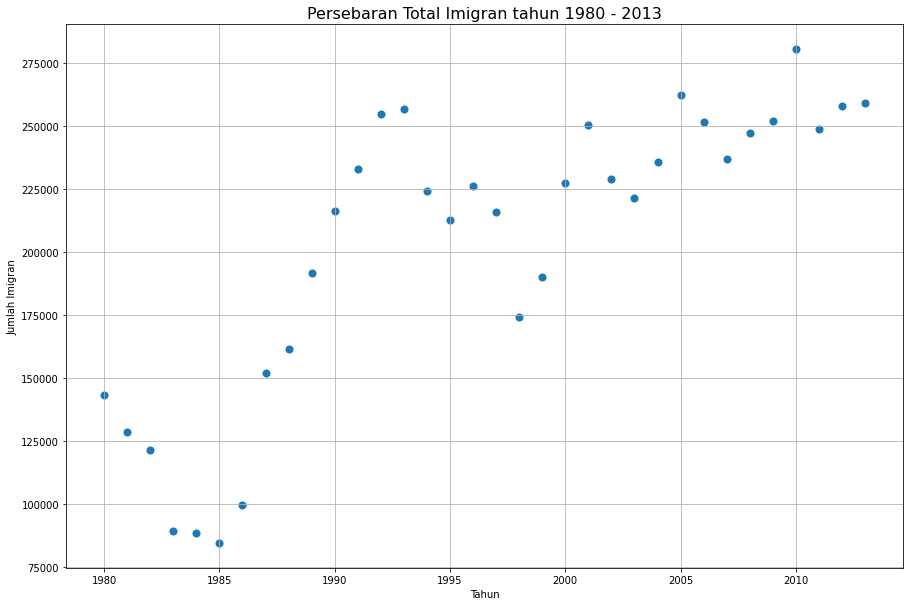

In [ ]:
df_totalTahun.plot(kind='scatter',x='Year',y='Total',figsize=(15,10),s=50)
plt.grid()
plt.title('Persebaran Total Imigran tahun 1980 - 2013',fontsize=16)
plt.ylabel('Jumlah Imigran')
plt.xlabel('Tahun')
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan persebaran Total Imigran dari seluruh negara ke Kanada pada tahun 1980 - 2013 menggunakan Scatter Plot. Penggunaan Scatter Plot disini memudahkan kita untuk melihat persebaran data berdasarkan time series, seperti melihat bentuk trendnya menaik apa menurun, berdasarkan hasil plotting disini trend untuk total Imigrannya adalah menaik. Dapat dilihat juga pada hasil plotting disini untuk skala nilainya ada per 25,000 orang. Informasi yang didapatkan berupa:
1. Jumlah Total Imigran pada seluruh negara menurun pada rentang tahun 1980 - 1985. Kemudian melonjak sampai tahun 1993 yang setelahnya menurun lagi sampai tahun 1998. Kemudian terjadi kenaikan yang fluktuatif sampai pada puncak total terbanyak pada tahun 2010
2. Total Imigran seluruh Negara terendah terdapat pada tahun 1985
3. Total Imigran seluruh Negara tertinggi terdapat pada tahun 2010
4. Setelah tahun 1985, total imigran seluruh negara menaik terus menerus

### - Rerata tahunan dari 1980 - 2013

In [ ]:
series = df.loc[:,1980:2013].sum()
df_rataTahun = series.to_frame(name='Total')
df_rataTahun.reset_index(inplace=True)
df_rataTahun.rename(columns={'index': 'Year'},inplace = True)

In [ ]:
df_rataTahun['Total'] = df_rataTahun['Total']/195.0
df_rataTahun.rename(columns={'Total':'Rerata'})

,Year,Rerata
0,1980,734.035897
1,1981,659.697436
2,1982,621.410256
3,1983,457.358974
4,1984,452.676923
5,1985,432.543590
6,1986,509.492308
7,1987,779.871795
8,1988,828.641026
9,1989,982.307692


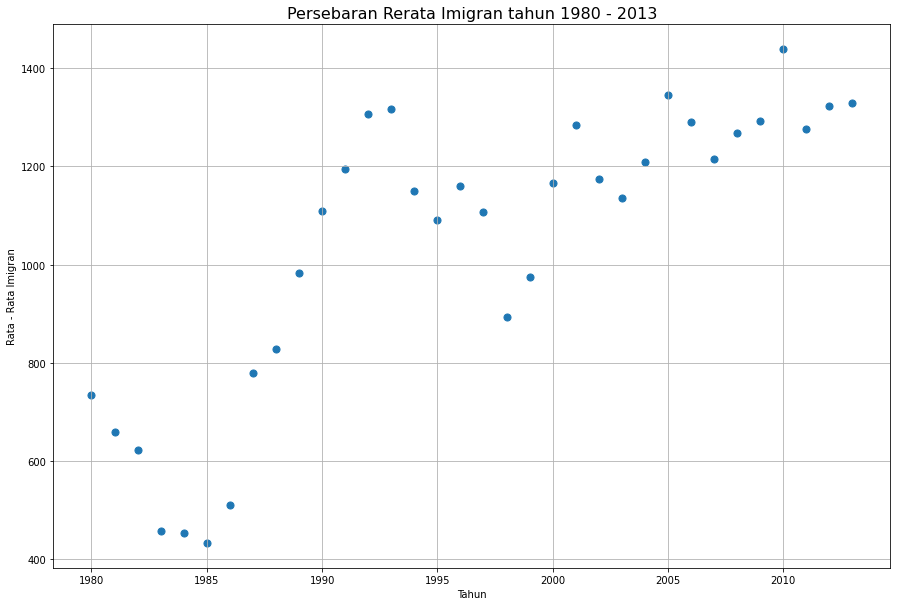

In [ ]:
df_rataTahun.plot(kind='scatter',x='Year',y='Total',figsize=(15,10),s=50)
plt.grid()
plt.title('Persebaran Rerata Imigran tahun 1980 - 2013',fontsize=16)
plt.ylabel('Rata - Rata Imigran')
plt.xlabel('Tahun')
plt.show()

**Penjelasan**

-> Graph diatas menggambarkan persebaran rata - rata Imigran dari seluruh negara ke Kanada pada tahun 1980 - 2013 menggunakan Scatter Plot. Penggunaan Scatter Plot disini memudahkan kita untuk melihat persebaran data berdasarkan time series, seperti melihat bentuk trendnya menaik apa menurun, berdasarkan hasil plotting disini trend untuk rata - rata Imigrannya adalah menaik. Dapat dilihat juga pada hasil plotting disini untuk skala nilainya ada per 200 orang. Informasi yang didapatkan berupa:
1. rata - rata Imigran pada seluruh negara menurun pada rentang tahun 1980 - 1985. Kemudian melonjak sampai tahun 1993 yang setelahnya menurun lagi sampai tahun 1998. Kemudian terjadi kenaikan yang fluktuatif sampai pada puncak total terbanyak pada tahun 2010
2. rata - rata Imigran seluruh Negara terendah terdapat pada tahun 1985
3. rata - rata Imigran seluruh Negara tertinggi terdapat pada tahun 2010
4. Setelah tahun 1985, rata - rata imigran seluruh negara menaik terus menerus

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dde367c-bfe6-49eb-b791-d5c19f996f91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>